In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
data = df.where(pd.notnull(df),'')

In [5]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
print(df.iloc[2])

Category                                                 spam
Message     Free entry in 2 a wkly comp to win FA Cup fina...
Name: 2, dtype: object


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.shape

(5572, 2)

In [9]:
data.loc[data['Category']== 'spam','Category',]=0
data.loc[data['Category']== 'ham','Category',]=1

In [10]:
X=data['Message']
Y=data['Category']

In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [14]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [15]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words = 'english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [16]:
print(X_train)

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object


In [17]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34840 stored elements and shape (4457, 7440)>
  Coords	Values
  (0, 5818)	0.22682143517864364
  (0, 2497)	0.2442158912653505
  (0, 694)	0.3171299579602537
  (0, 6264)	0.1898892037332199
  (0, 5800)	0.17558937755823417
  (0, 3262)	0.33791755486732394
  (0, 2049)	0.3034375179183143
  (0, 7300)	0.24288153842988894
  (0, 2724)	0.3544175987866074
  (0, 354)	0.3544175987866074
  (0, 7162)	0.2550284465664535
  (0, 258)	0.2379428657041507
  (0, 7222)	0.2173884735352799
  (0, 5512)	0.1898892037332199
  (1, 2555)	0.3840709491751004
  (1, 3804)	0.1902902346515268
  (1, 3932)	0.24325511357721427
  (1, 4509)	0.4028245991060671
  (1, 2440)	0.33870544648398715
  (1, 3333)	0.20665394084233096
  (1, 5650)	0.360444144470318
  (1, 2335)	0.2162321275166079
  (1, 6738)	0.28986069568918
  (1, 6109)	0.3239762634465801
  (1, 3267)	0.2678713077029217
  :	:
  (4452, 2438)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 3978)	0.457416073

In [18]:
model = LogisticRegression(class_weight='balanced')

In [19]:
model.fit(X_train_features,Y_train)

LogisticRegression(class_weight='balanced')

In [20]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [21]:
print('accuracy on training data:',accuracy_on_training_data)

accuracy on training data: 0.9930446488669509


In [22]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [23]:
print('accuracy on test data:',accuracy_on_test_data)

accuracy on test data: 0.9865470852017937


In [37]:
X_test_vec = feature_extraction.transform(X_test)
y_pred = model.predict(X_test_vec)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       149
           1       0.99      0.99      0.99       966

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [24]:
input_mail=["okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm"]
input_data_features=feature_extraction.transform(input_mail)
predict = model.predict(input_data_features)
print(predict)

if(predict[0]==1):
    print('ham mail')
else:
    print('spam')

[0]
spam


In [25]:
test_messages = [
    "Dear user, your account has been flagged for suspicious activity. Please verify your identity to avoid deactivation: http://verify-now-security-check.com",
    "Exclusive Amazon Prime offer just for you! Get 90% off all electronics today only. Redeem your gift voucher at: www.amzn-prime-sale.today",
    "We reviewed your resume and found a perfect work-from-home opportunity. No experience needed. Get paid ₹50,000/week. Apply now: jobalert247.work",
    "Your SBI account will be suspended due to KYC verification failure. Update your KYC here immediately: www.sbi-update.net",
    "We understand if you're not interested in receiving our exclusive stock tips. Click here to unsubscribe and stop missing out: investsecret.link/unsub",
    "Your parcel is waiting for delivery. Confirm your address and pay ₹49 shipping charge here: parceltrack.co.in/confirm"
]

for msg in test_messages:
    features = feature_extraction.transform([msg])
    prediction = model.predict(features)
    label = "Spam" if prediction[0] == 0 else "Ham" 
    print(f"Message: {msg}\nPrediction: {label}\n")


Message: Dear user, your account has been flagged for suspicious activity. Please verify your identity to avoid deactivation: http://verify-now-security-check.com
Prediction: Spam

Message: Exclusive Amazon Prime offer just for you! Get 90% off all electronics today only. Redeem your gift voucher at: www.amzn-prime-sale.today
Prediction: Spam

Message: We reviewed your resume and found a perfect work-from-home opportunity. No experience needed. Get paid ₹50,000/week. Apply now: jobalert247.work
Prediction: Ham

Message: Your SBI account will be suspended due to KYC verification failure. Update your KYC here immediately: www.sbi-update.net
Prediction: Spam

Message: We understand if you're not interested in receiving our exclusive stock tips. Click here to unsubscribe and stop missing out: investsecret.link/unsub
Prediction: Spam

Message: Your parcel is waiting for delivery. Confirm your address and pay ₹49 shipping charge here: parceltrack.co.in/confirm
Prediction: Ham



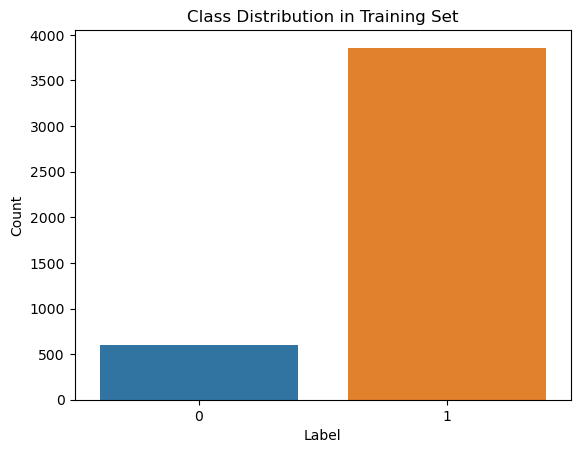

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=pd.DataFrame({'Label': Y_train}), x='Label')
plt.title("Class Distribution in Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


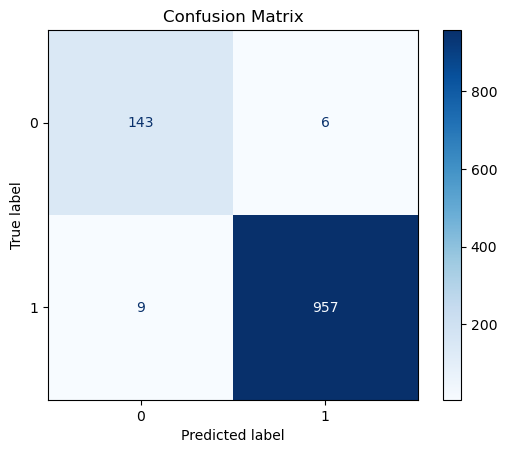

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot it
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
